In [5]:
import pandas as pd
import matplotlib.pyplot as plotter
%matplotlib inline

In [6]:
# All Steps except feature selection and Multicollinearity same as LinearRegression without Regularization

dataset = pd.read_csv('./datasets/algerian-forest-fires-cleaned.csv')
dataset.drop(['month', 'day', 'year', 'Fire'], axis = 1, inplace = True)

# Aliasing Independent and Dependent Features
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

# No Need for Feature Selection and Multi-Collinearity Check. Model Hyperparameters will handle itself

# Dataset Split
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 13)

# Standardization of Input Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_Train)
X_Train_Norm = pd.DataFrame(scaler.transform(X_Train), columns = X_Train.columns)
X_Test_Norm = pd.DataFrame(scaler.transform(X_Test), columns = X_Test.columns)

In [7]:
# Linear (ElasticNet) Regression Model Training (L1 & L2 Regularization)
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_Train_Norm, Y_Train)

# Predicting for Test Data and Visualizing
Y_Test_Predicted = model.predict(X_Test_Norm)
Y_Train_Predicted = model.predict(X_Train_Norm)

In [8]:
# Performance Metrics
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

print('For Test Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Test, Y_Test_Predicted))
print('Root Mean Square Error:', root_mean_squared_error(Y_Test, Y_Test_Predicted))
print(f'R² Score: {round(100*r2_score(Y_Test, Y_Test_Predicted),2)}%')
print()

print('For Training Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Train, Y_Train_Predicted))
print('Root Mean Square Error:', root_mean_squared_error(Y_Train, Y_Train_Predicted))
print(f'R² Score: {round(100*r2_score(Y_Train, Y_Train_Predicted),2)}%')

For Test Dataset
Mean Absolute Error: 1.668636227886549
Root Mean Square Error: 2.1644408334554917
R² Score: 89.87%

For Training Dataset
Mean Absolute Error: 1.809723734279175
Root Mean Square Error: 2.3552793241737366
R² Score: 90.45%


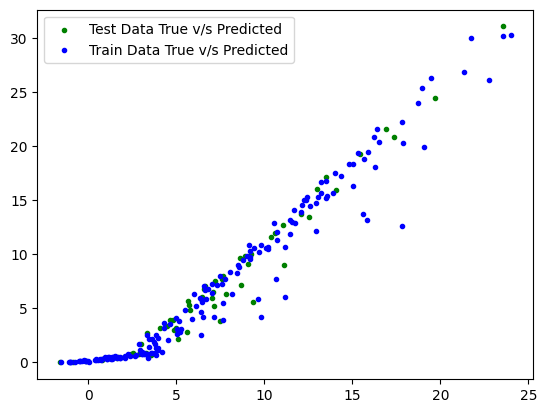

In [9]:
plotter.scatter(Y_Test_Predicted, Y_Test, marker = '.', color = 'green', label = 'Test Data True v/s Predicted')
plotter.scatter(Y_Train_Predicted, Y_Train, marker = '.', color = 'blue', label = 'Train Data True v/s Predicted')
plotter.legend()
plotter.show()